## Implementing Kmeans from scratch (in 3 lines of code)

By gradually implementing the basic version of the Kmenas algorithm, we will practice our numpy skills, and also begin to introduce some ML concepts.  

#### K-means algorithm loss function

We've seen that the K-means algorithm aims to cluster the data into groups that minimize the following loss function 

$$L(C,I) = \sum_{k=1}^K\sum_{n\in I_k} ||x_n - C_{k}||$$

where 
1. $I_k$ is the index set of all samples in the $k$'th cluster
2. $C_k$ is the centroid of the $k$'th cluster

#### K-means algorithm pseudo code

We've also seen that the K-means algorithm tries to achieve its aim by iterating between the following two steps:
1. **Given** groups' centers, **set** the samples of group k to be all the points closest to the group's center $C_k$ (we'll implement this in 2 lines of code)
2. **Given** group's samples, **set** $C_k$ to be the mean of all points in the $k$'th group (we'll implement this in 1 line of code)


A bit more formally, the following algorithm converges to a minimum of the loss function

**Initialization:** 
1. Set $t=0$
2. Set cluster centroids (randomly choose $K$ points from the data, or generate random samples) $$C^{(0)}_1, \ldots, C^{(0)}_k \in \mathbb{R}^n$$

**Iterate until convergence:**
1. For each $n=1,2,\ldots,N$ set $$c_n^{(t)} = \text{argmin}_k || x_n - C_k^{(t)} ||$$ 


2. For each $k=1,2,\ldots,K$ update cluster centroid $C_k^{(t)}$ to be the mean of all samples in the $k$'th cluster  $$C_k^{(t)} = \frac{1}{\left|I_k^{(t)}\right|}\sum_{n\in I_{k}^{(t)}} x_n$$


3. t=t+1

## Plan

We will implement the algorithm according to the following steps:
1. To implement step 1 above:
    - compute the distances between every data point and all cluster centers
    - given all distances between a point and all clusters centers, find the closest center
2. To implement step 2 above:
    - for each cluster, given its data points, compute it's mean 

## Setting the ground

We'll begin with importing some standard modules

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

The following function is for plotting and visualization only, and is not directly related to the algorithm, so we'll use it without discussing it

In [40]:
def Plot2dColoredSamples(X,Y,color=list('rgbckmy'),marker=['o'],PlotMeans = False):
    plt.figure(figsize=[7,7])
    uY = np.unique(Y)
    K = len(uY)
    for k in range(0,K):
        if len(marker)==1:
            plt.scatter(X[Y==uY[k],0], X[Y==uY[k],1], c=color[k], marker=marker[0], s=20)
            if PlotMeans:
                m = X[Y==k].mean(axis=0)
                plt.scatter(m[0], m[1], c=color[k], marker='$ ' + str(k) + '$', s=200)
        else:
            plt.scatter(X[Y==uY[k],0], X[Y==uY[k],1], c=color[k], marker='$' + marker[k] + '$', s=20)
            m = X[Y==k].mean(axis=0)
            plt.scatter(m[0], m[1], c=color[k], marker='$ C_{' + str(k) + '}$', s=200)
    plt.gca().set_aspect('equal', adjustable='box')
    return

#### First, we'll choose a utility function to compute the distance between all pairs of data points and cluster centroids

In [41]:
from scipy.spatial.distance import cdist as distance

We can use the function ``` distance``` to compute the distance between points ```X=[1,1]``` and ```Z=[0,0]```

In [6]:
X = np.array([[1,1]])# distance expects a 2D array, and treats each row as a different data point
print('X:')
print(X)
Z = np.array([[0,0]])
print('\nZ:')
print(Z)
d = distance(X,Z)
print('\ndistance(X,Z):')
print(d)

X:
[[1 1]]

Z:
[[0 0]]

distance(X,Z):
[[ 1.41421356]]


Next, lets compute the distance between points ```X=[1,1]``` and every row of the array ```Z=[[0,0],[2,3]]```

In [7]:
X = np.array([[1,1]])
print('X:')
print(X)
Z = np.array([[0,0],[2,3]])
print('\nZ:')
print(Z)
d = distance(X,Z)
print('\ndistance(X,Z):')
print(d)

X:
[[1 1]]

Z:
[[0 0]
 [2 3]]

distance(X,Z):
[[ 1.41421356  2.23606798]]


Finally, lets compute the distance between each row of ```X=[[1,1],[-2,4],[2,4]]``` and every row of ```Z=[[0,0],[2,3]]```

In [8]:
X = np.array([[1,1],[-2,4],[2,4]])
print('X:')
print(X)
Z = np.array([[0,0],[2,3]])
print('\nZ:')
print(Z)
d = distance(X,Z)
print('\ndistance(X,Z):')
print(d)

X:
[[ 1  1]
 [-2  4]
 [ 2  4]]

Z:
[[0 0]
 [2 3]]

distance(X,Z):
[[ 1.41421356  2.23606798]
 [ 4.47213595  4.12310563]
 [ 4.47213595  1.        ]]


**Exercise**

Compute and print the Euclidean distances between each row of X and every row of Z, for each of the following
1. $X=\left[2,5\right], Z = \left[-1,4\right]$

2. $X=\left[0.2,5.7\right], Z = \left[\begin{array}{cc} 
0.2 & 1.5\\
-2.1 & -0.08
\end{array}\right]$

3. $X=\left[\begin{array}{cc} 
0.12 & -3.4\\
2.3 & -1.2\\
-8.1 & 31.2
\end{array}\right], Z = \left[\begin{array}{cc} 
0.2 & 1.5\\
-2.1 & -0.08
\end{array}\right]$

4. Considering X and Z in section 3 above, for each row in X find the nearest (that is, with the smallest distance) row in Z 

**Solution**

In [13]:
X = np.array([[2.5]])
Z = np.array([[-1.4]])
print("X:")
print(X)
d = distance(X,Z)
print("distance:")
print(d)
X =np.array([[0.2,5.7]])
Z = np.array([[0.2,1.5],[-2.1,-0.08]])
d = distance(X,Z)
print("distance:")
print(d)
X = np.array([[0.12,-3.4],[2.3,-1.2],[-8.1,31.2]])
d = distance(X,Z)
print("distance:")
print(d)


X:
[[ 2.5]]
distance:
[[ 3.9]]
distance:
[[ 4.2         6.22080381]]
distance:
[[  4.90065302   3.99384526]
 [  3.42052628   4.54030836]
 [ 30.83796362  31.85024961]]


In [16]:
print(d.argmin(axis=1))
print(Z)
Z[d.argmin(axis=1)]


[1 0 0]
[[ 0.2   1.5 ]
 [-2.1  -0.08]]


array([[-2.1 , -0.08],
       [ 0.2 ,  1.5 ],
       [ 0.2 ,  1.5 ]])

**End exercise**

The last thing we need to do is to compute the means of each cluster based on its samples, which the followng exercise helps us achieve.

**Exercise**
1. Run the following python code, and explore a little the generated data to understand it better
```python
# Run this code in a code cell
X = np.vstack((np.random.randn(10,3),np.random.randn(10,3)+5))
Y = np.hstack((np.zeros(10),np.ones(10)))
```
2. Find the average row of X (that is, compute the mean of X along its columns)
3. Find the average row of all of X's rows for which the corresponding Y is 0:
    - first, select from X all the rows for which the corresponding Y is equal to 0
    - then, compute the average row of these rows
4. Similarly, find the average row of all of X's rows for which the corresponding Y is 1
5. Implement 3+4 together in one line of code
6. Explain how this code is related to the Kmeans algorithm

**Solution**

In [32]:
X = np.vstack((np.random.randn(10,3),np.random.randn(10,3)+5))
Y = np.hstack((np.zeros(10),np.ones(10)))
print("X=\n",X)
print("Y=\n",Y)
print(X.mean(axis=0))
z = np.where(Y > 0)[0]
print(z)
zz = np.where(z>0)
print("meann=",X[zz].mean(axis=0))
print("mean=",X[Y==0].mean(axis=0))



X=
 [[-1.46173269 -0.68343977  0.3675449 ]
 [ 0.19031156 -0.8517292   1.8227236 ]
 [-0.52157968 -1.18468659  0.9606934 ]
 [ 1.32906285 -0.8174931  -1.40134729]
 [ 1.03043827 -2.04732361 -1.22662166]
 [ 0.96744615 -0.05535255 -0.26393735]
 [ 0.35281661 -0.15277442 -1.29868672]
 [ 1.27607535  1.32501405  0.20533256]
 [ 0.04513402  2.33962481 -0.27643285]
 [-0.25957698  0.36448125  1.47132196]
 [ 6.59277075  4.74142737  5.30833125]
 [ 3.62191653  4.68802389  4.1597096 ]
 [ 3.99316825  6.68157672  4.20771334]
 [ 4.46839409  5.36584879  6.29782527]
 [ 5.48111513  7.75935511  4.92533202]
 [ 5.25871644  5.27560067  6.43504939]
 [ 5.50723895  4.8837703   4.05251141]
 [ 5.24444346  6.40134483  4.58961821]
 [ 5.52894362  5.24614779  5.86351966]
 [ 4.19524626  7.34664703  3.72083889]]
Y=
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
[ 2.64201745  2.83130317  2.49605198]
[10 11 12 13 14 15 16 17 18 19]
meann= [ 0.29483954 -0.17636791  0.03605905]
mean= [ 0.294

In [34]:
[X[Y==y].mean(axis=0) for y in (0,1)]

[array([ 0.29483954, -0.17636791,  0.03605905]),
 array([ 4.98919535,  5.83897425,  4.9560449 ])]

In [36]:
print(X)

[[-1.46173269 -0.68343977  0.3675449 ]
 [ 0.19031156 -0.8517292   1.8227236 ]
 [-0.52157968 -1.18468659  0.9606934 ]
 [ 1.32906285 -0.8174931  -1.40134729]
 [ 1.03043827 -2.04732361 -1.22662166]
 [ 0.96744615 -0.05535255 -0.26393735]
 [ 0.35281661 -0.15277442 -1.29868672]
 [ 1.27607535  1.32501405  0.20533256]
 [ 0.04513402  2.33962481 -0.27643285]
 [-0.25957698  0.36448125  1.47132196]
 [ 6.59277075  4.74142737  5.30833125]
 [ 3.62191653  4.68802389  4.1597096 ]
 [ 3.99316825  6.68157672  4.20771334]
 [ 4.46839409  5.36584879  6.29782527]
 [ 5.48111513  7.75935511  4.92533202]
 [ 5.25871644  5.27560067  6.43504939]
 [ 5.50723895  4.8837703   4.05251141]
 [ 5.24444346  6.40134483  4.58961821]
 [ 5.52894362  5.24614779  5.86351966]
 [ 4.19524626  7.34664703  3.72083889]]


**End exercise**

### We can now implement Kmeans in 3 lines

- Copy the code below into a new code cell
- Complete it using what we have learned above, to implement all steps of Kmeans
- Apply it to the data above for each of the following number of clusters: K = 3,4,5,15 and explain the results  

```python
def BNHP_Kmeans(X, K, means=[], NumIterations = 20):
    # Init: for simplicity, we'll take the first K data points to initialize the cluster means
    # You can try replacing it with other initialization, and see what happens
    means = X[:K]
    # The code below implements the core logic of the Kmeans algorithm
    for _ in range(NumIterations):
        # line 1: compute the distance between each sample and every cluster center
        distances = ...
        # line 2: set the samples of group k to be all the points closest to Ck
        labels = ...
        # line 3: for each k set Ck to be the mean of all points in group k 
        means = ...
    return means, labels     
```

In [44]:
def BNHP_Kmeans(X, K, means=[], NumIterations = 20):
    # Init: for simplicity, we'll take the first K data points to initialize the cluster means
    # You can try replacing it with other initialization, and see what happens
    means = X[:K]
    # The code below implements the core logic of the Kmeans algorithm
    for _ in range(NumIterations):
        # line 1: compute the distance between each sample and every cluster center
        distances = distance(X,means)
        # line 2: set the samples of group k to be all the points closest to Ck
        labels = distances.argmin(axis=1)
        # line 3: for each k set Ck to be the mean of all points in group k 
        means = [X[labels==k].mean(axis=0) for k in range(K)]
    return means, labels

After completing your implementation of Kmeans, you can use the following code to visualize your clustered data

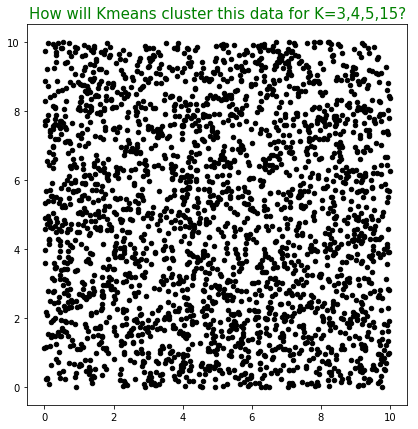

In [42]:
X = np.random.rand(2500,2)*10
Plot2dColoredSamples(X,np.ones(X.shape[0]),color='k')
plt.title('How will Kmeans cluster this data for K=3,4,5,15?',color='g',fontsize=15);

After completing your implementation of Kmeans, you can use the following code to visualize your clustered data

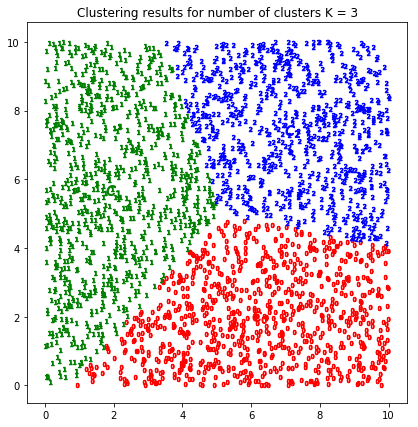

In [45]:
K = 3
color=list('rgbcmy')*5
centroids, labels = BNHP_Kmeans(X, K)
Plot2dColoredSamples(X,labels,color=color,marker=[str(s) for s in np.unique(labels)])
plt.title('Clustering results for number of clusters K = ' +str(K));

Cluster the data into K= 3, 4, 5, 15 groups and explain the results

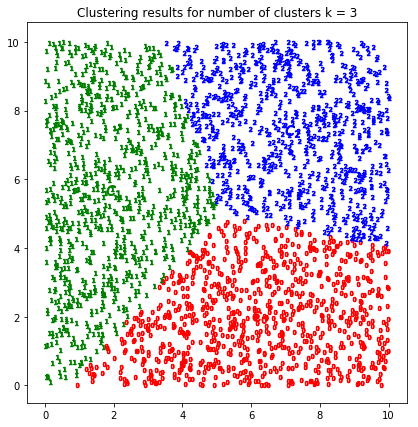

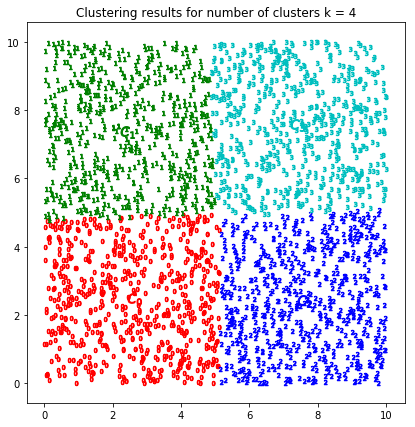

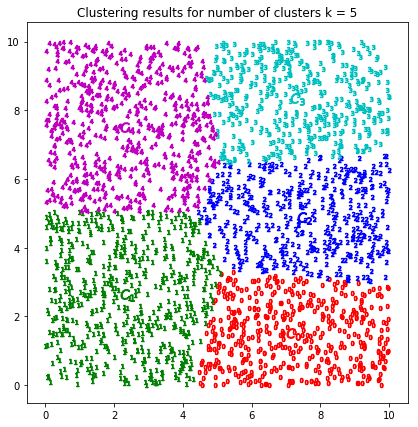

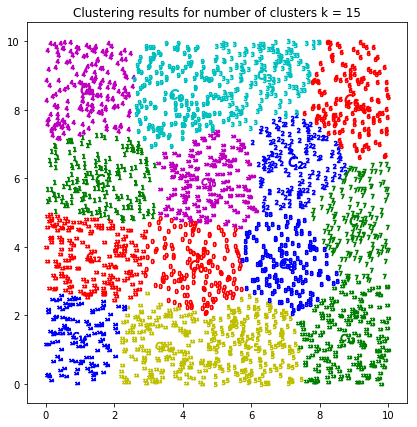

In [47]:
K = [3,4,5,15]
for k in K:
    color=list('rgbcmy')*5
    centroids, labels = BNHP_Kmeans(X, k)
    Plot2dColoredSamples(X,labels,color=color,marker=[str(s) for s in np.unique(labels)])
    plt.title('Clustering results for number of clusters k = ' +str(k));

### What if the data is not ditributed uniformly?

In [ ]:
Xdense  = np.random.uniform(0, 10, 450).reshape(225,2)
Xsparse = np.hstack((np.random.uniform(10, 30, 25).reshape(25,1),np.random.uniform(0, 10, 25).reshape(25,1)))
X = np.vstack((Xdense,Xsparse))
Plot2dColoredSamples(X=X,Y=np.ones(X.shape[0]),color=list('k'))

Run our Kmeans on this data for various values of $K=3, 6, 9, 12, 20$ and explain the results

**Exercise**

Compute the distortion for clustering our data above into K=3 clusters 

In [ ]:
K=3
means, labels = BNHP_Kmeans(X, K)
Plot2dColoredSamples(X,labels,color=color,marker=[str(s) for s in np.unique(labels)])
plt.title('Clustering results for number of clusters K = ' +str(K))
    
ClustersDistortion = [distance(X[labels==k],means[k].reshape(1,2)).sum() for k in range(K)]# means[k].reshape(1,2) so that it is a 2D array; assuming every cluster has more than one point so that X[labels==k] is already 2D 
ClustersDistortion

Add it to be one of the results our Kmeans implementation returns and verify it works as expected

### Conclusion

In this notebook we've avhieved two main goals 
1. practiced our numpy skills
2. discussed the unsupervised ML problem of clustering, and studied the canonical Kmeans algorithm by discussing the theory that underlies it, implementing it in code, and applying it to some data we've generated